In [1]:
"""
Created on 2018/05/01
Revised on 2018/10/26

@author: STEVEN.CY.CHUANG
"""

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

from keras.datasets import mnist
from keras.metrics import binary_accuracy
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))

import numpy as np
import sys  
import unittest
sys.path.append('../')
from util.visualization import *
from keras.datasets import mnist
from util import import_notebook
from module.autoencoder import *

Using TensorFlow backend.


importing Jupyter notebook from ../module/autoencoder.ipynb


In [2]:
class Test_util(unittest.TestCase):
    
    num_epochs = 10
    size_batch = 512
    dim_latent = 4
    lay_den_enc = [16, 8]
    name_optim = "adam"
    path_temp_best = "../model/temp/"
    patience = 3

    # Load the dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype("float32") / 255.
    x_test = x_test.astype("float32") / 255.
    num_train = len(x_train)
    num_test = len(x_test)
    size_digit = x_train.shape[1:]

    dim_input = np.prod(x_train.shape[1:])
    x_train = x_train.reshape((num_train, dim_input))
    x_test = x_test.reshape((num_test, dim_input))

    # Train the model
    ae = AE(dim_input, dim_latent=dim_latent, lay_den_enc=lay_den_enc)
    history, time_train = ae.fit(x_train, x_test,
                                 num_epochs=num_epochs,
                                 size_batch=size_batch,
                                 path_temp_best=path_temp_best
                                 )
    encoder = ae.encoder
    decoder = ae.decoder
    
    
    def test_comp_reconst(self):
        # the 1st case, the error should be 0
        x = np.array([[[1,2,3,4],[2,3,4,5]],
                      [[2,3,4,5],[3,4,5,6]],
                      [[3,4,5,6],[4,5,6,7]]])
        decode = np.array([[[1,2,3,4],[2,3,4,5]],
                          [[2,3,4,5],[3,4,5,6]],
                          [[3,4,5,6],[4,5,6,7]]])
        err = comp_reconst(x, decode)
        print(err)

        # the 2nd case, the error should be 0.2041241452319315
        x = np.array([[[1,2,3,4],[2,3,4,5]],
                      [[2,3,4,5],[3,4,5,6]],
                      [[3,4,5,6],[4,5,6,7]]])
        decode = np.array([[[1,2,3,4],[2,3,4,5]],
                           [[2,3,4,5],[3,4,5,6]],
                           [[3,4,5,6],[4,5,6,6]]])
        err = comp_reconst(x, decode)
        print(err)
        
        # the 3rd case for another shape, the error should be the same with the 2nd
        x = np.array([[[[1,2],[3,4]],[[2,3],[4,5]]],
                      [[[2,3],[4,5]],[[3,4],[5,6]]],
                      [[[3,4],[5,6]],[[4,5],[6,7]]]])
        decode = np.array([[[[1,2],[3,4]],[[2,3],[4,5]]],
                           [[[2,3],[4,5]],[[3,4],[5,6]]],
                           [[[3,4],[5,6]],[[4,5],[6,6]]]])
        err = comp_reconst(x, decode)
        print(err)
        
        # the 4th case, the error should be 0.4972182922592389
        x = np.array([[1,0,0],[0,1,0],[0,0,1]])
        decode = np.array([[0.9,0.5,0.5],[0.9,0.5,0.5],[0.9,0.5,0.5]])
        err = comp_reconst(x, decode, method='log_loss')
        print(err)
        
        # the 5th case, the error should be 2
        x = np.array([0,0,0,0])
        decode = np.array([0,-2,0,2])
        err = comp_reconst(x, decode, method='mse')
        print(err)
        
        # the 6th case, the error should be 1
        x = np.array([0,0,0,0])
        decode = np.array([0,-2,0,2])
        err = comp_reconst(x, decode, method='mae')
        print(err)
        
        
    def test_plot_scatter_encode(self):
        encoder = self.encoder
        decoder = self.decoder
        y_test = self.y_test
        x_test = self.x_test
        
        # Get encoded and decoded values
        encode_test = encoder.predict(x_test)
        mean_enc_test = np.mean(encode_test, axis=0)
        std_enc_test = np.std(encode_test, axis=0)
        
        # Plot the scatter of the encoding space
        xlim = (mean_enc_test[0] - 4*std_enc_test[0], mean_enc_test[0] + 4*std_enc_test[0])
        ylim = (mean_enc_test[1] - 4*std_enc_test[1], mean_enc_test[1] + 4*std_enc_test[1])
        plot_scatter_encode(encode_test, y_test, xlim, ylim, num_show=10000)
        plot_scatter_encode(encode_test, y_test, ylim, xlim, num_show=10000, dim_show=[1, 0])
        xlim = (mean_enc_test[2] - 4*std_enc_test[2], mean_enc_test[2] + 4*std_enc_test[2])
        ylim = (mean_enc_test[3] - 4*std_enc_test[3], mean_enc_test[3] + 4*std_enc_test[3])
        plot_scatter_encode(encode_test, y_test, xlim, ylim, num_show=10000, dim_show=[2, 3])
        xlim = (mean_enc_test[1] - 4*std_enc_test[1], mean_enc_test[1] + 4*std_enc_test[1])
        ylim = (mean_enc_test[3] - 4*std_enc_test[3], mean_enc_test[3] + 4*std_enc_test[3])
        plot_scatter_encode(encode_test, y_test, xlim, ylim, num_show=10000, dim_show=[1, 3])
        
        # Test size_marker
        xlim = (mean_enc_test[0] - 4*std_enc_test[0], mean_enc_test[0] + 4*std_enc_test[0])
        ylim = (mean_enc_test[1] - 4*std_enc_test[1], mean_enc_test[1] + 4*std_enc_test[1])
        plot_scatter_encode(encode_test, y_test, xlim, ylim, num_show=10000, size_marker=2)

    def test_plot_scatter_decode(self):
        encoder = self.encoder
        decoder = self.decoder
        size_digit = self.size_digit
        x_test = self.x_test
        
        # Get encoded and decoded values
        encode_test = encoder.predict(x_test)
        mean_enc_test = np.mean(encode_test, axis=0)
        std_enc_test = np.std(encode_test, axis=0)
        
        # Plot the decoding results from the encoding scatter
        xlim = (mean_enc_test[0] - 4*std_enc_test[0], mean_enc_test[0] + 4*std_enc_test[0])
        ylim = (mean_enc_test[1] - 4*std_enc_test[1], mean_enc_test[1] + 4*std_enc_test[1])
        plot_scatter_decode(decoder, size_digit, xlim, ylim)
        plot_scatter_decode(decoder, size_digit, ylim, xlim, dim_show=[1, 0])
        xlim = (mean_enc_test[2] - 4*std_enc_test[2], mean_enc_test[2] + 4*std_enc_test[2])
        ylim = (mean_enc_test[3] - 4*std_enc_test[3], mean_enc_test[3] + 4*std_enc_test[3])
        plot_scatter_decode(decoder, size_digit, xlim, ylim, dim_show=[2, 3])
        xlim = (mean_enc_test[1] - 4*std_enc_test[1], mean_enc_test[1] + 4*std_enc_test[1])
        ylim = (mean_enc_test[3] - 4*std_enc_test[3], mean_enc_test[3] + 4*std_enc_test[3])
        plot_scatter_decode(decoder, size_digit, xlim, ylim, dim_show=[1, 3])

0.0
0.2041241452319315
0.2041241452319315
0.4972182922592389
2.0
1.0


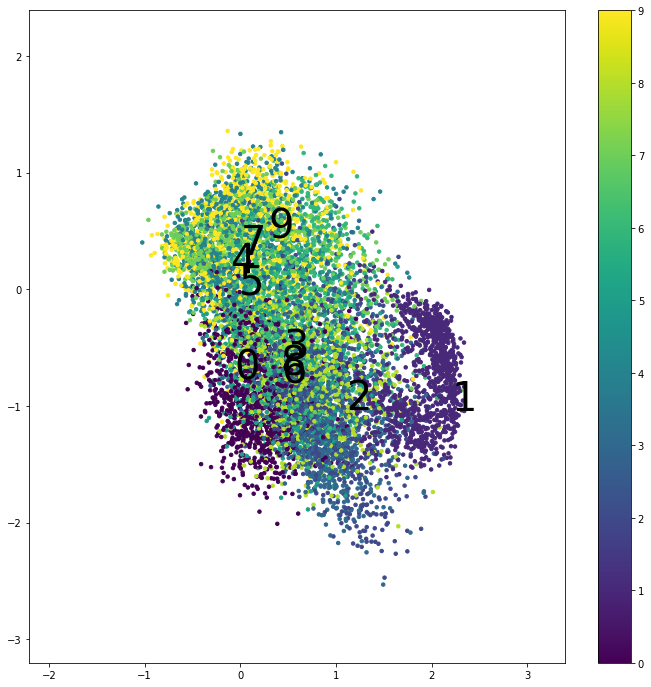

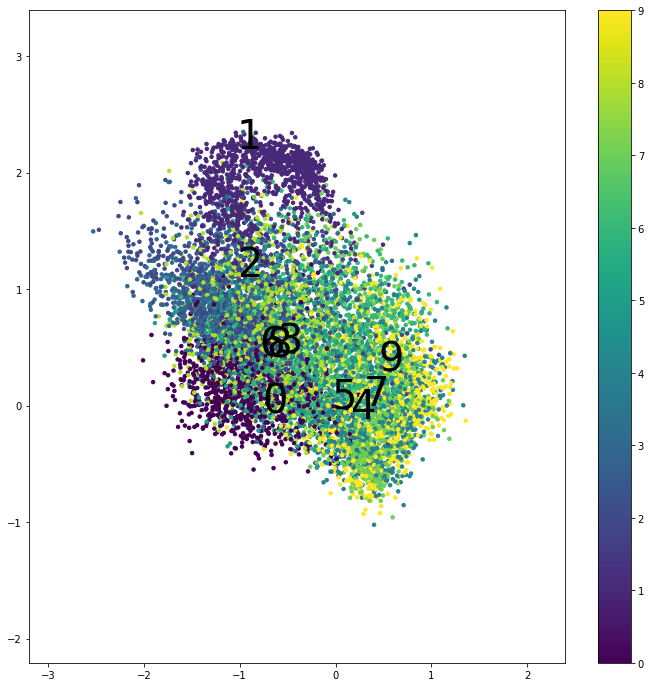

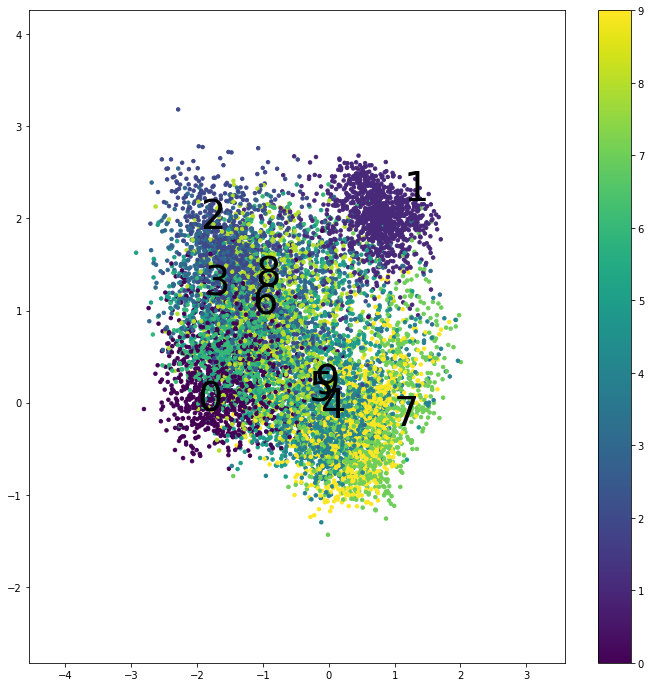

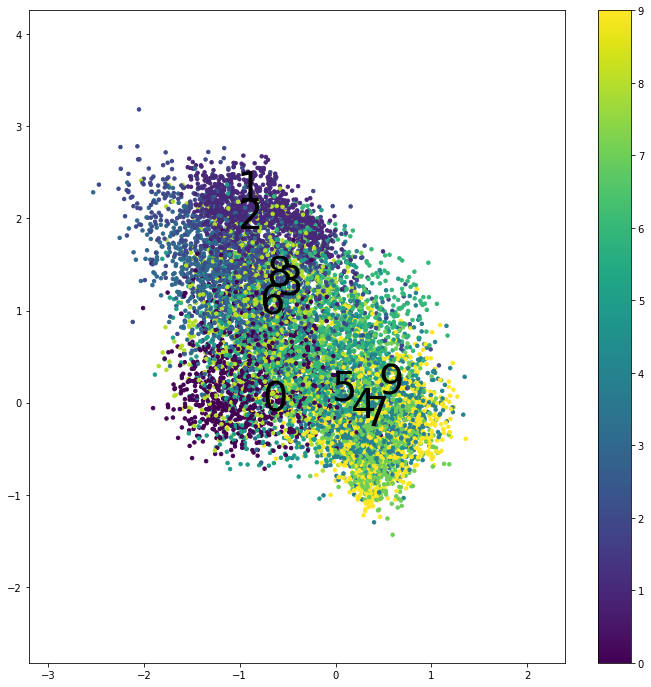

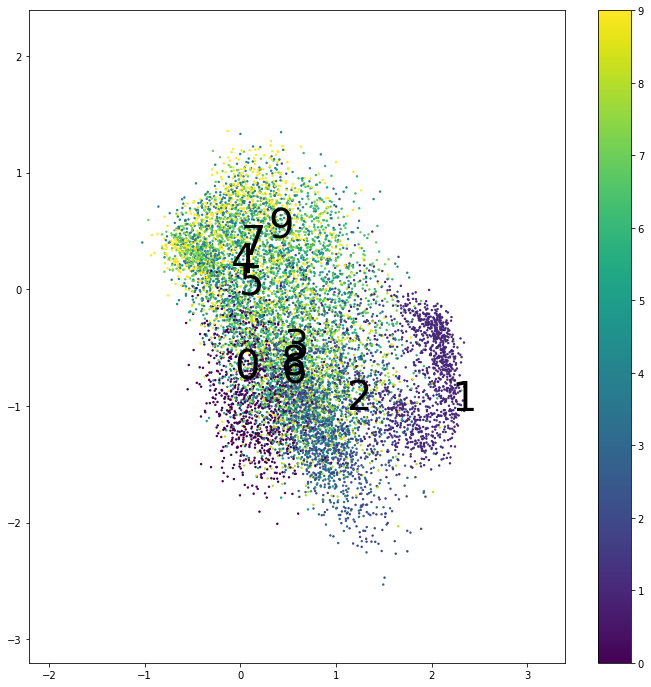

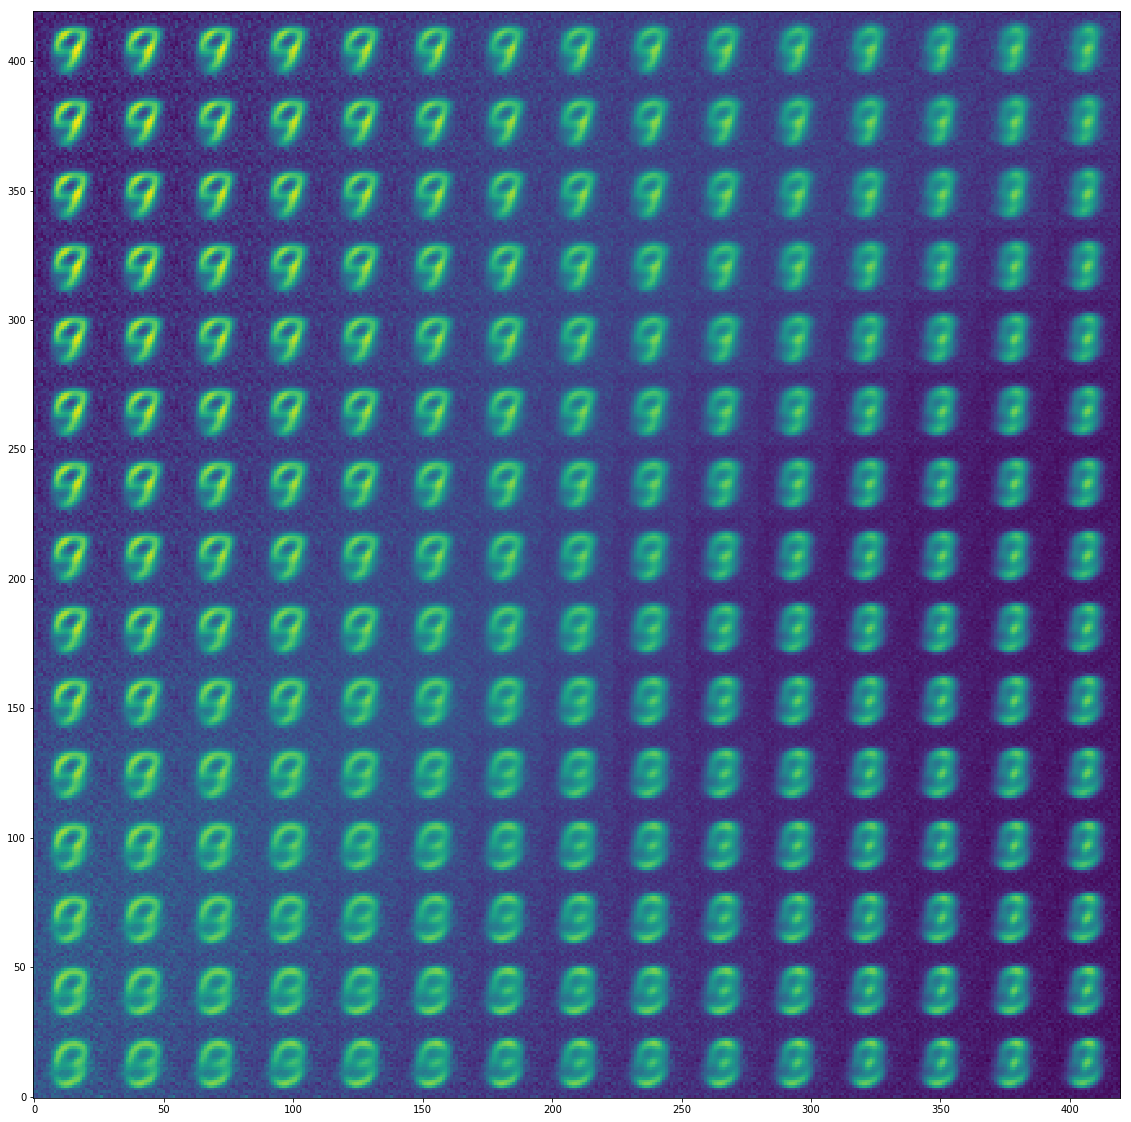

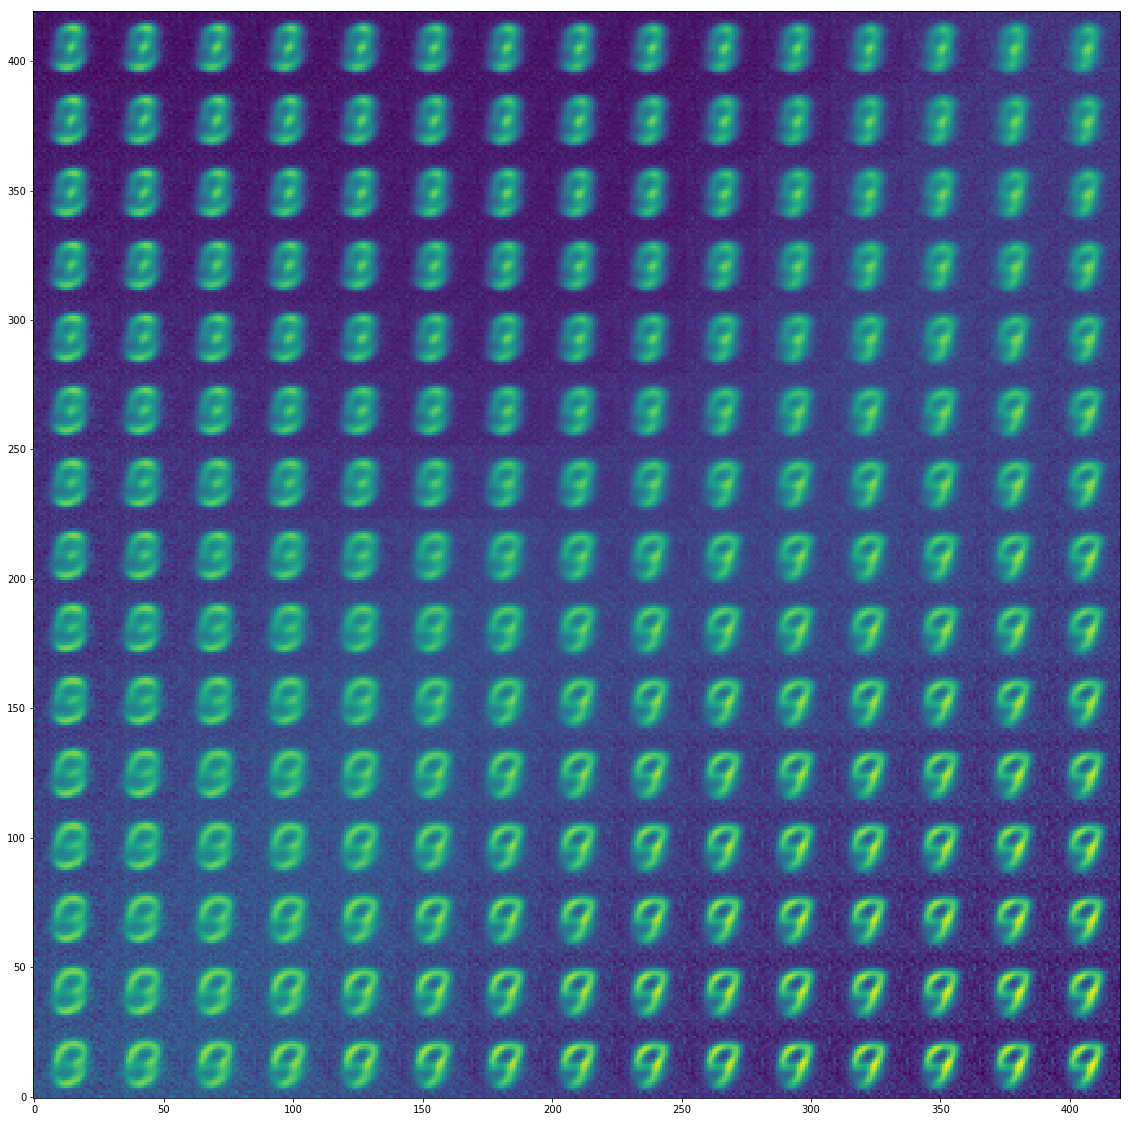

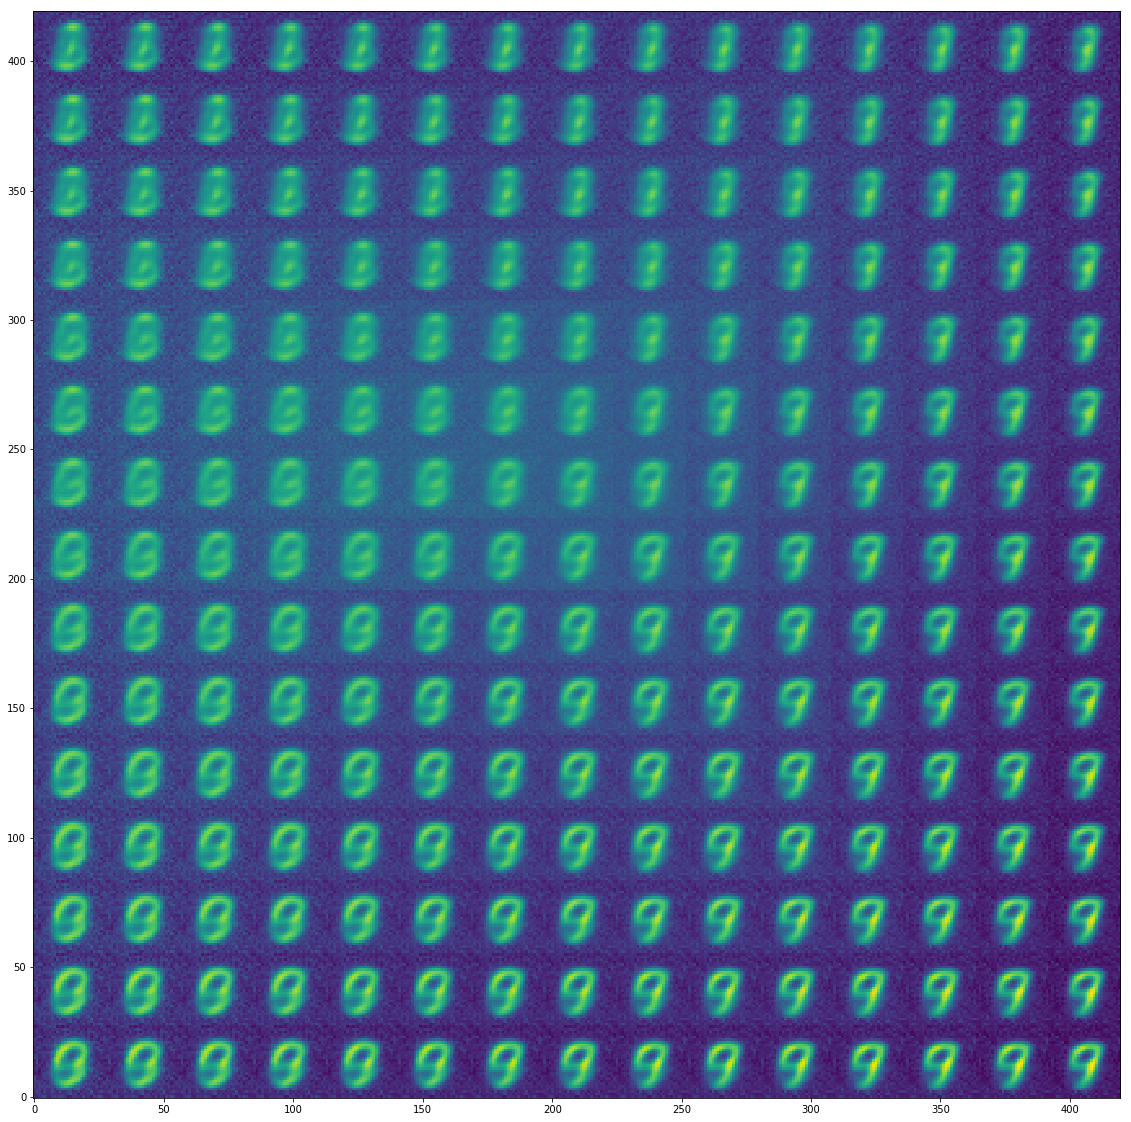

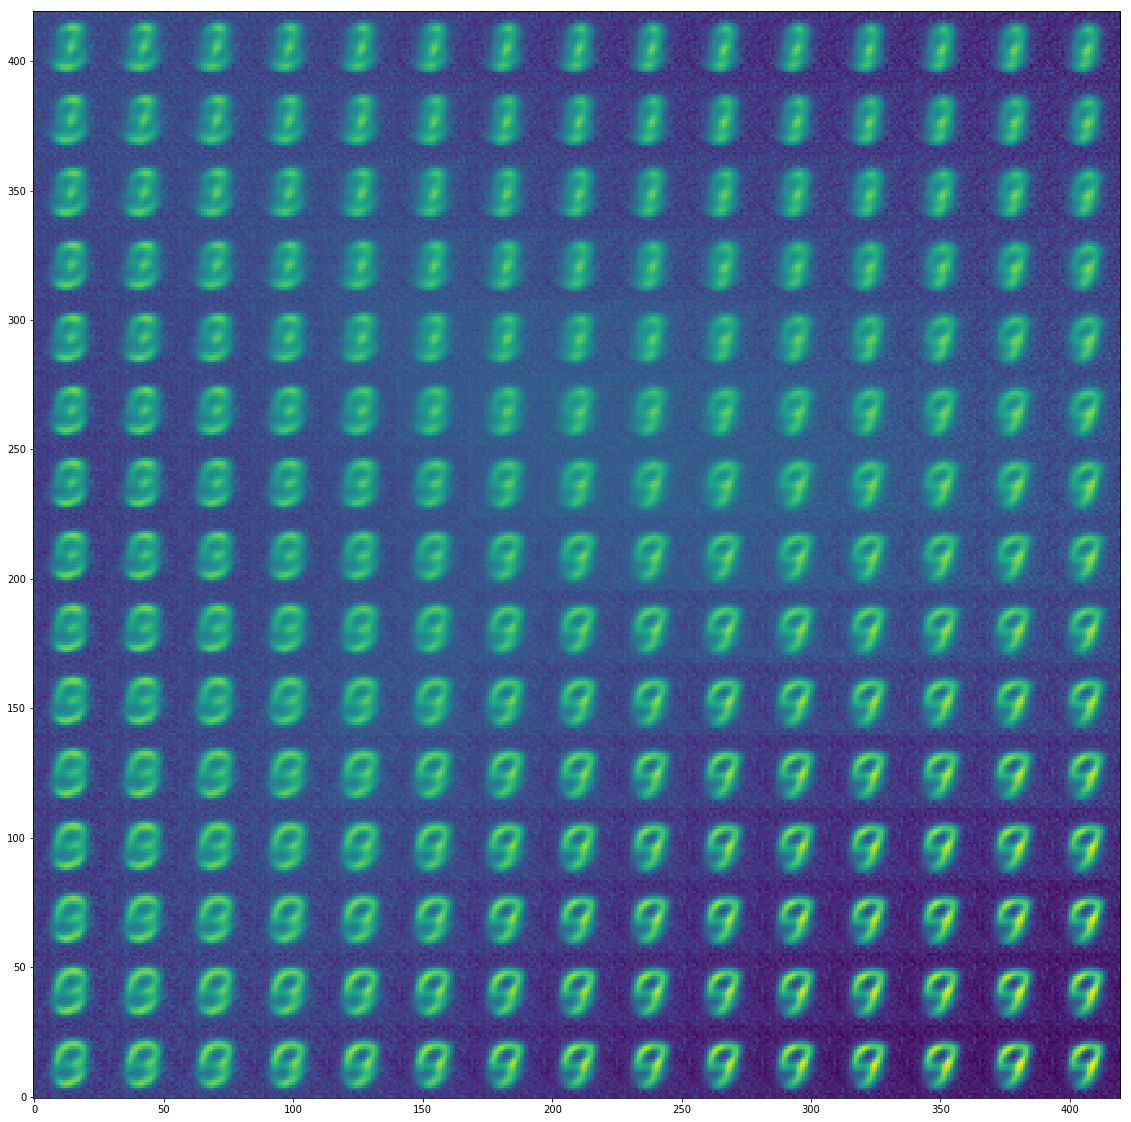

In [3]:
if __name__ == '__main__':
    test = Test_util()
    test.test_comp_reconst()
    test.test_plot_scatter_encode()
    test.test_plot_scatter_decode()